**MATH 317 LAB ASSIGNMENT 2** <br>
**DUE SUNDAY OCTOBER 22, 22:00 EDT** <br>
**SKYLAR BITAR - 261050625**

**Part 1**<br>
In this exercise, we will be doing some explorations on power series methods.
1. Implement a function that computes sinx via the plain power series, that is, without any argument reduction. Study its convergence for different (large and small) values of x, by plotting a graph with n on the horizontal axis and the logarithm of the error on the vertical axis. What does the (average) slope of this graph signify?

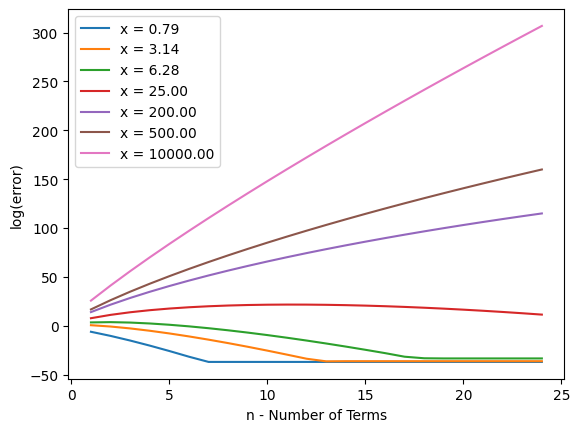

In [1]:
import math
import matplotlib.pyplot as plt

def thesin(x, n):
    result = x # This is our first term in the series
    sign = -1 # Our first operation will be a subtraction (and it will alternate with each iteration)
    power = 3 # Since we initialized first term, the next term has power 3

    for i in range(n):
        result = result + (1 * sign) * x ** power / math.factorial(power) # Apply the series for n iterations
        power = power + 2
        sign = sign * -1

    return result

def comperror(x, n):
    error = abs(math.sin(x) - thesin(x, n)) # This calculates the error
    # If it's too small, we will truncate at 10e-16 to avoid problems
    return error if error >= 10**-16 else 10**-16 

testvalues = [math.pi/4, math.pi, 2*math.pi, 25, 200, 500, 10000] # Test on these values
nvalues = range(1, 25)
errorvalues = []

for x in testvalues:
    errors = [math.log(comperror(x, n)) for n in nvalues]
    plt.plot(nvalues, errors, label=f'x = {x:.2f}') # Truncate at 2nd decimal

plt.xlabel('n - Number of Terms')
plt.ylabel('log(error)')
plt.legend()
plt.show()
    

Discussion: Notice that for smaller x values the slope is decreasing as n increases (and eventually plateaus at a minmum). This makes sense when we consider that for small values of x, we do not need as many terms to obtain a fairly accurate representation. On the other hand, it is clear there is substantial imprecision for very large x. This indicates to us that the Taylor series representation of sin(x) without argument reduction converges slowly, as it will need many terms in order to reach some level of accuracy. To see why, notice that for x = 25, it begins to increase, before reaching a point that it obtains enough terms and begins increasing in accuracy (in the graph: decreasing in error). For x large enough, the necessary number of terms will also increase substantially. 

2. Make a version 2.0 of your code for sin x by adding an argument reduction procedure. You need to make some design decisions on the argument reduction method, on how much you want to reduce the argument, etc. Consider several options to reduce the argument, and experimentally compare them with each other, in order to finally pick the best one. Demonstrate the superiority of version 2.0 as compared to version 1.0 on not-so-small arguments.

0.34202028390474665


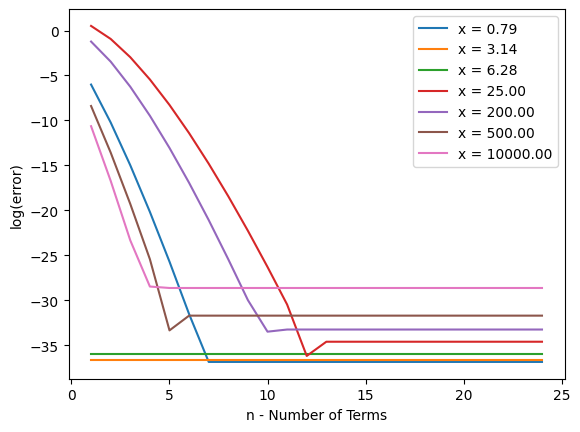

In [73]:
def thesin2(x, n):
    # This is our section for argument reduction into [0, pi]
    negative = False # This will indicate to us if the original angle was in a quadrant that is neg. in sin.
    if x < 0:
        x = abs(x) # If the angle is negative, make it pos. and use property sin(-x) = -sin(x) at the end
        negative = True
    if x >= math.pi: # If the angle is in a negative quadrant, we will use modulo pi and recall neg.
        x = x % (2 * math.pi)
        if x >= math.pi:
            x = x - math.pi
            negative = True

    result = x # Our initial term
    sign = -1 # Our first operation (will alternate)
    power = 3 # First power to be computed (second term)

    for i in range(n):
        result = result + (1 * sign) * x ** power / math.factorial(power) # Perform series up to nth term.
        power = power + 2
        sign = sign * -1

    if (negative): # Use sin(-x) = -sin(x) if necessary
        return -result
    else:
        return result

def comperror2(x, n):
    error = abs(math.sin(x) - thesin2(x, n)) # Compute the error and truncate if too small to represent
    return error if error >= 10**-16 else 10**-16

testvalues = [math.pi/4, math.pi, 2*math.pi, 25, 200, 500, 10000]
nvalues = range(1, 25)
errorvalues = []

for x in testvalues:
    errors = [math.log(comperror2(x, n)) for n in nvalues]
    plt.plot(nvalues, errors, label=f'x = {x:.2f}') # Truncate at 2nd decimal

plt.xlabel('n - Number of Terms')
plt.ylabel('log(error)')
plt.legend()
plt.show()

As we see here, regardless of how large x is, the slope will be decreasing and thus does not require very many terms to get to the limit of how precise the computer representation of the Taylor series for sin(x) can be for the given value of x (given by the plateau). As we see, the upper limit of necessary terms n here is < 15 (where n increases as x % pi ~ pi). Because of this, it is clearly a superior way to compute sin(x), especially for x >>, when compared to the implementation in part (a).

3. Implement a function that computes ln x for any given positive input. In the same spirit as the preceding 2 questions, study its convergence behaviour, and various argument reduction options.

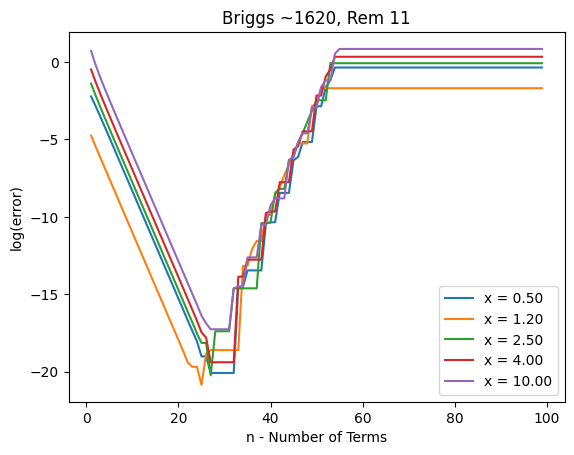

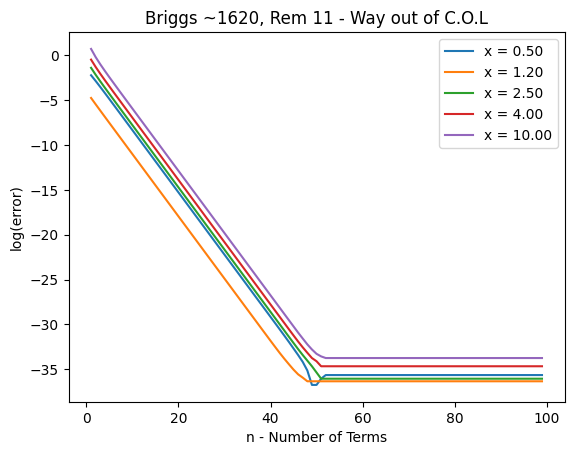

In [3]:
def myLawn(x, n):
    # Formula from lecture 8, Briggs ~1620, Rem 11 with C.O.D
    return ((2**n)*(((x**(1/(2**n))) - 1))) 
                      
def comperrorLawn(x, n):
    error = abs(math.log(x) - myLawn(x, n)) 
    return error if error >= 10**-16 else 10**-16 # In case error too small to show

testvalues = [0.5, 1.2, 2.5, 4, 10] # Test on variety of numbers
nvalues = range(1, 100) # With n sufficiently large to see C.O.D.
errorvalues = []

for x in testvalues:
    errors = [math.log(comperrorLawn(x, n)) for n in nvalues]
    plt.plot(nvalues, errors, label=f'x = {x:.2f}')

plt.xlabel('n - Number of Terms')
plt.ylabel('log(error)')
plt.legend()
plt.title("Briggs ~1620, Rem 11")
plt.show()

def myLawn2(x, n):
    # Using formula from lecture 8, Briggs ~1620, Rem 11 with way out of C.O.D.
    # AR: Z_{n+1} = Z_n/(1 + sqrt(1+Z_n))
    z = x - 1
    for i in range(n):
        z = z/(1 + math.sqrt(1 + z))
    l = z
    for j in range(n):
        z *= 2
    return z

def comperrorLawn2(x, n):
    error = abs(math.log(x) - myLawn2(x, n)) 
    return error if error >= 10**-16 else 10**-16 # In case error too small to show

testvalues = [0.5, 1.2, 2.5, 4, 10] # Test on variety of numbers
nvalues = range(1, 100) # To match the first ln computation, even though it really needs half.
errorvalues = []

for x in testvalues:
    errors = [math.log(comperrorLawn2(x, n)) for n in nvalues]
    plt.plot(nvalues, errors, label=f'x = {x:.2f}')

plt.xlabel('n - Number of Terms')
plt.ylabel('log(error)')
plt.legend()
plt.title("Briggs ~1620, Rem 11 - Way out of C.O.L")
plt.show()

In the first implementation to compute lnx for any positive value x, we use the method seen in Lecture 8, where we take advantage of the fact that ln(1 + y) $\approx$ y if y $\approx$ 0. Using this we get that $ln(x) \approx 2^n(x^{\frac{1}{2^n}} - 1) = z_n.$ However, as seen in the graph above (and in class), this causes a C.O.D! In the graph, notice that we reach a minimal error at ~25 terms, but any further term will actually increase the error of representing ln(x). However, as seen in the same lecture, we can get around this cancellation of digits by reducing the argument first, which is a more stable way to go about things. We do this, by first letting $z_0$ = x - 1 and finding $z_n$ by repeatedly using the formula $z_n = \frac{z_{n-1}}{1 + sqrt(1+z_{n-1})) (this is the reduction). Thus, ln(x) $\approx 2^n(z_n)$. As we see in the graph for the argument reduction form, we get a similar trajectory for the first ~25 terms, however instead of rebounding and accumulating error (like in the first), it continues to become more accurate until it plateaus in accuracy around the ~50 term. 

4. Propose several different fast ways of computing ln 3, and compare their speed.

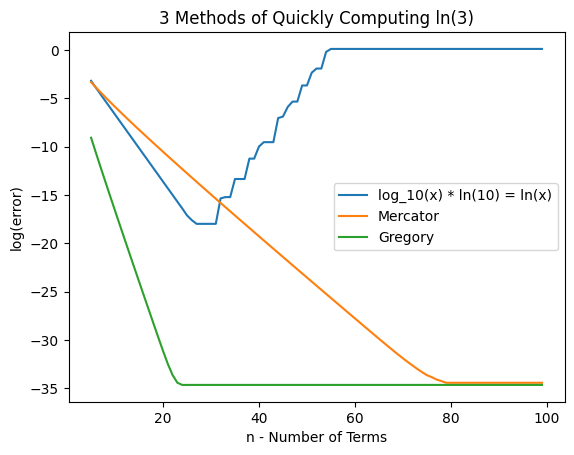

In [4]:
def leLog10(n):
    # Using the relation log_10(x) = ln(x)/ln(10) (from Calculator notes)
    return math.log10(3) * myLawn(10, n) 

def Mercator3(n):
    # Using Mercator Series with enhanced convergence from Power Series (63)
    result = 0
    v = 1
    # This is our argument reduction for enhanced convergence
    term = 2/3 # Use property that log(3) = -log(1/3), so first term 1 - 1/3 = 2/3

    for i in range(n):
        result += term/v
        v += 1
        term *= 2/3

    return result

def Gregory3(n):
    # Using regular Gregory series from Power Series (64).
    result = 0
    v = 1
    term = 1/2
    # No argument reduction used in this version
    for i in range(n):
        result += term/v
        v += 2
        term *= 1/4

    return 2*result # We multiply by two since we are calculating the 1/2 of the result

def comperrorLog(n):
    error = abs(math.log(3) - leLog10(n)) 
    return error if error >= 10**-16 else 10**-16 # For the following, if error too small, we cap.

def comperrorMerc(n):
    error = abs(math.log(3) - Mercator3(n))
    return error if error >= 10**-16 else 10**-16

def comperrorGreg(n):
    error = abs(math.log(3) - Gregory3(n)) 
    return error if error >= 10**-16 else 10**-16

nvalues = range(5, 100)

errors1 = [math.log(comperrorLog(n)) for n in nvalues]
plt.plot(nvalues, errors1, label = 'log_10(x) * ln(10) = ln(x)')
errors2 = [math.log(comperrorMerc(n)) for n in nvalues]
plt.plot(nvalues, errors2, label = 'Mercator')
errors3 = [math.log(comperrorGreg(n)) for n in nvalues]
plt.plot(nvalues, errors3, label = 'Gregory')

plt.xlabel('n - Number of Terms')
plt.ylabel('log(error)')
plt.legend()
plt.title("3 Methods of Quickly Computing ln(3)")
plt.show()

We have here 3 different methods of computing ln(3). The first calculates it using the property that log_10(x)*ln(10) = ln(x) (which is a property we see in the book). While this is a bit quicker than the Mercator series initially, it is not good if high accuracy is required as it quickly accumulates error and becomes inaccurate after ~30 terms. On the other hand, the Mercator series is a linear decreasing slope, indicating that it will provide us a good estimation for ln(3), but not necessarily very quickly. This is likely not what we want to use if we want to quickly calculate ln(3). Finally, the Gregory series appears to be the best candidate for quickly computing ln(3). It gets a very accurate result after only ~20 terms, which is far quicker than the other 2 methods (in addition to the methods seen in part c). It is also a fairly steep slope and starts lower than the other two, so we can expect that we will still get a fairly good approximation after only a couple terms. We could have also improved this Gregory series even more by reducing the argument as seen in part (59) of Power series, however it takes quite a bit more code to work out and requires libraries to solve for $z = \frac{1+x}{1-x}$, so I did not include its implementation.

**Part 2**<br>
1. Experimentally compare the performance of Goldschmidt’s method and Heron’s method for computing square roots. Design an experiment to illustrate the self-correcting behaviour of Heron’s method, and the opposite behaviour of Goldschmidt’s method.

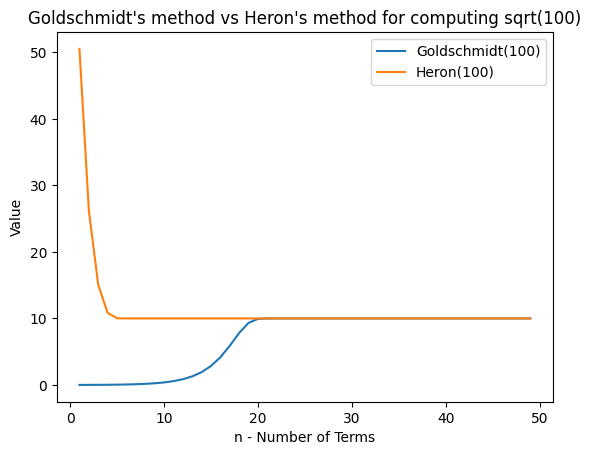

In [5]:
# Goldschmidt Method
def Goldschmidt(b, n):
    k = 1/b**2 # Pretend this comes from a lookup table to approximate 1/(b^2) as our guess for k_0
    b_n = b # This is where we will find b_n. We let b_0 = b
    y = b # Since we want sqrt(b) and not 1/sqrt(b), we also let y = b
    for i in range (n):
        y *= k # Using the formula for y, we update by continuously multiplying in the next k for some n iterations
        b_n *= k**2 # We find the next b_n. This allows us to find the next k
        k = (3 - b_n)/2 # And we find the next k to use in the following iteration.
    return y

# Heron's Method
def Heron(a, n):
    x = a # Our initial guess for x
    for i in range(n):
        x = 0.5*(x + a/x) # Formula for Heron's method. Performed for n iterations
    return x

nvalues = range(1, 50)
Goldschmidt = [Goldschmidt(100, n) for n in nvalues]
plt.plot(nvalues, Goldschmidt, label = 'Goldschmidt(100)')
Heron = [Heron(100, n) for n in nvalues]
plt.plot(nvalues, Heron, label = 'Heron(100)')

plt.xlabel('n - Number of Terms')
plt.ylabel('Value')
plt.legend()
plt.title("Goldschmidt's method vs Heron's method for computing sqrt(100)")
plt.show()


In the graph above, we compute the square root of 100 using both Heron's method and Goldschmidt's method. To see why Heron is self-correcting and Goldschmidt isn't, notice that despite Heron having a more inaccurate first guess, it reaches the answer (10) much more quickly. The fact that its slope is so steep, tells us that it quickly corrects an incorrect first guess, whereas the opposite is true for Goldschmidt. Despite having a closer first guess, it required more than triple the number of iterations to begin bringing itself to the correct value. This tells us that the initial guess is far more important for accuracy in Goldschmidt since it does not self-correct a bad first guess. Experimentally, putting k = 1/sqrt(b) gets us immediately to the correct value (which is expected), however of course we cannot use the sqrt(x) to find sqrt(x). Thus, we used our actual initial guess of k = 1/b^2, which results in what we see above. 

2. Propose two different fixed point methods for approximating the smallest positive root of sin x = $e^{−x}$, such that one method is linearly convergent, and the other is quadratically convergent. Perform experimental tests to show that indeed they have the desired convergence orders.

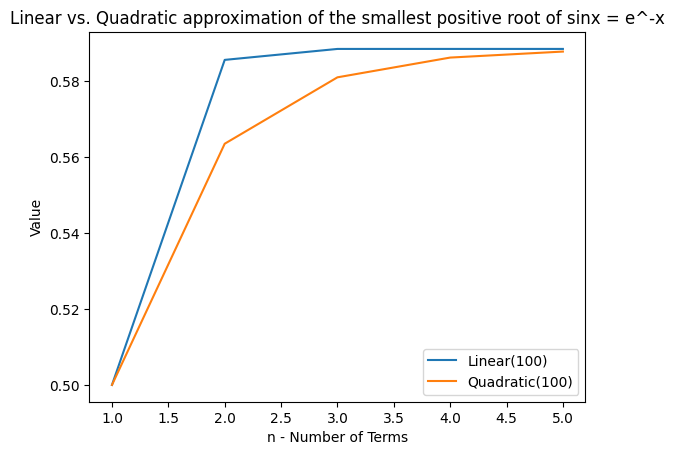

In [35]:
# Fixed Point Iteration
def quadratic(n): 
    x_t = 0 # Initial guess. Lowest possible "positive" value
    for i in range(n):
        x_t = x_t + (math.exp(-x_t) - math.sin(x_t))/2 # Using f(x)/lambda
    return x_t

# Newton-Raphson method
def linear(n):
    x_t = 0 # Initial guess. Lowest possible "positive" value
    for i in range(n):
        x_t = x_t - ((math.exp(-x_t) - math.sin(x_t))/(- math.exp(-x_t) - math.cos(x_t))) #Obtained from NR
    return x_t
    
nvalues = range(1, 6) # Only test for small range, converges quickly regardless
Linear = [linear(n) for n in nvalues]
plt.plot(nvalues, Linear, label = 'Linear(100)')
Quadratic = [quadratic(n) for n in nvalues]
plt.plot(nvalues, Quadratic, label = 'Quadratic(100)')

plt.xlabel('n - Number of Terms')
plt.ylabel('Value')
plt.legend()
plt.title("Linear vs. Quadratic approximation of the smallest positive root of sinx = e^-x")
plt.show()

Above, I used two methods to compute the smallest positive root of sinx = $e^{-x}$ (i.e. 0.58853274...), one linear and one quadratic. For the linear equation, I used the Newton-Raphson method. Although it typically converges quadratically, notice that it is not the case here. This is likely because sinx = $e^{-x}$ is not continuous and there are discrete values. Numerically, $\phi = x + \frac{e^{-x}-sin(x)}{-e^{-x}-cos(x)}$ and $\phi' = 1 - \frac{2e^{-x}cosx + 1}{(-cosx-e^-x)^2}.$ When $\alpha = 0$ (as was chosen), $\phi'(0) = \frac{1}{4},$ which clearly shows that it is converging linearly and we can see that from the plot above. For the quadratic computation, I used the equation $\phi = x + \frac{(e^{-x} - sin(x))}{2},$ where $\phi' = 1 + \frac{1}{2}(-e^{-x}-cos(x)).$ On $\alpha = 0$ (as was chosen), $\phi'(0) = 0$, which shows that it is converging quadratically, which is similarly clear from the image above.

3. Recall the triple angle formula $cos3x = 4cos^3x − 3cosx$, which tells us that if we can solve the equation $4y^3 − 3y = a$ for any given a ∈ [−1, 1], then we can trisect any angle, meaning that cos($\frac{α}{3}$) can be inferred from the value of cos α. For the purpose of trisecting angles, design an iterative method to solve the equation $4y^3 − 3y = a$, where 0 ≤ a ≤ 1 is given. Note that the equation has in general 3 roots, but they are related so that any one of the roots would give full information about the others. Test the convergence speed of your method. Compute sin20◦ by trisecting the angle 60◦, and compare it to the value you get from using the power series code for sin x from Part 1.


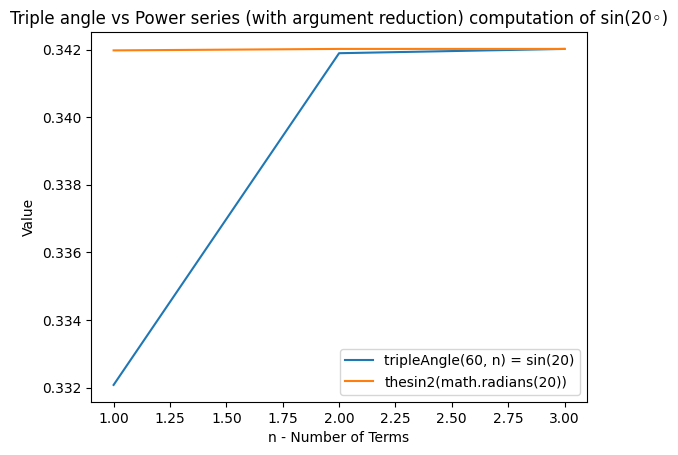

In [118]:
def myCos(x, n): # This function is from the first assignment, to be used to approximate a
    y = abs(x) % math.pi # First reduce x to 0 <= y <= pi
    l = y/2 # Then reduce further to 0 <= l <= pi/2 to meet reduction form mentioned above
    a = 1
    term = 1 # We preload the first term
    sign = -1 # Second term to be subtracted, we will then switch sign every operation 

    for i in range(1, 2*n, 2): # Step by 2 to simplify getting the term from x^n/n! -> x^(n+2)/(n+2)!
        term *= l*l/(i*(i+1)) # We get the next term (as shown just above)
        a += sign * term # Add/Subtract the term to the answer depending on the sign
        term *= -1 # Switch sign every operation

    # If input is in third or fourth quadrant, we swap sign.
    if ((x % (2*math.pi)) >= (math.pi) and (x % (2*math.pi)) < (2*math.pi)): 
        return -(2*(a*a)-1)
    else:
        return 2*(a*a)-1 # Output reduction form

def tripleAngle(x, n):
    y = 1 # This choice of y0 protects against division by 0 and imaginary roots
    a = myCos(math.radians(x), n) # We will approximate cos(theta) by the first two terms in series
    for i in range(n):
        y = y - (((4*(y**3))-(3*y) - a)/((12*(y**2)) - 3)) # Newton Raphson on equation
    return math.sqrt(1 - y**2) # Since y computes cos(x/3), we use sinx = sqrt(1-cos^2x)


nvalues = range(1, 4) # Only test for small range, converges quickly regardless
triple = [tripleAngle(60, n) for n in nvalues]
plt.plot(nvalues, triple, label = 'tripleAngle(60, n) = sin(20)')
sin = [thesin2(math.radians(20), n) for n in nvalues]
plt.plot(nvalues, sin, label = 'thesin2(math.radians(20))')

plt.xlabel('n - Number of Terms')
plt.ylabel('Value')
plt.legend()
plt.title("Triple angle vs Power series (with argument reduction) computation of sin(20◦)")
plt.show()


Above, we see a comparison of using triple angle formula vs. the sin approximation (with argument reduction) to compute sin(20◦). Although the tripleAngle is slightly less fast at computing sin(20) (or rather the sin with argument reduction is very fast), they are quite similar all things considered. After only 2 iterations, they are both nearly exact in their calculation. This is likely due to our choice of y0 in addition to potential errors between converting from cos to sin. Regardless, both perform really well.